In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('outlier_removal.csv')

In [4]:
df.sample(5)

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,ratio
878,dlf regal gardens,1.26,7636.0,3.0,3.0,2,others,12.0,North,Relatively New,sector 90,1650.079,flat,1744.0,NaN,NaN,0,0,0,0,1,2,8,550.0
1960,breez global heights,0.42,6420.0,2.0,2.0,2,not avilable,2.0,NaN,New Property,sohna road,654.206,flat,623.0,NaN,NaN,0,0,0,0,0,2,73,327.0
1202,paras dews,1.20,6818.0,3.0,4.0,3+,servant room,9.0,North-East,Relatively New,sector 106,1760.047,flat,1760.0,NaN,1130.0,0,1,0,0,0,2,174,587.0
1486,ss the leaf,2.10,7467.0,4.0,4.0,3,"pooja room,study room,servant room",7.0,North,Relatively New,sector 85,2812.374,flat,2812.0,NaN,2400.0,1,1,0,1,0,2,49,703.0
1397,emaar gurgaon greens,1.45,8787.0,3.0,3.0,3,servant room,8.0,North-East,Relatively New,sector 102,1650.165,flat,1650.0,NaN,1100.0,0,1,0,0,0,2,49,550.0


In [5]:
df.isnull().sum()

society                   0
price                    67
price_persqft            33
bedRoom                  40
bathroom                 40
balcony                  40
additionalRoom            0
floorNum                 60
facing                 1134
agePossession             0
sector                    0
area                      0
type                      0
super_built_up_area    1914
built_up_area          3791
carpet_area            1898
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
ratio                    40
dtype: int64

In [6]:
df[['area','super_built_up_area','built_up_area','carpet_area','type']].sample(5)

,area,super_built_up_area,built_up_area,carpet_area,type
1786,1480.166,1480.0,NaN,NaN,flat
1287,3000.043,3000.0,NaN,NaN,flat
708,1457.072,1943.0,NaN,1457.0,flat
2284,1458.564,NaN,NaN,NaN,flat
3643,1442.000,NaN,NaN,NaN,house


In [7]:
t=df[(df['super_built_up_area'].isna())&(df['built_up_area'].isna())&(df['carpet_area'].isna())]

In [8]:
t['built_up_area']=t['area'].astype(float)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_40046/790182397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['built_up_area']=t['area'].astype(float)


In [9]:
df.update(t)

In [10]:
df['built_up_area'].isnull().sum()

2829

In [11]:
df[(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())].shape

(940, 24)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

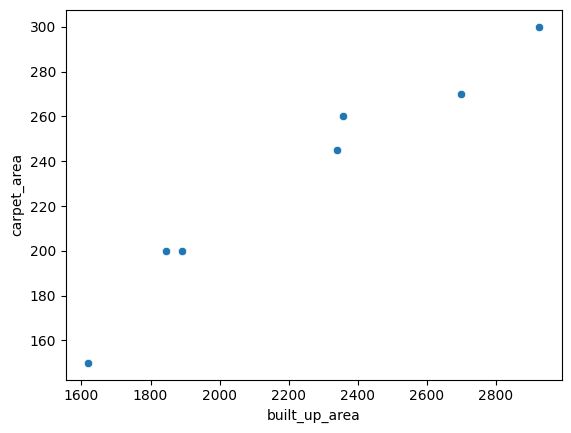

In [12]:
sns.scatterplot(data=df,x='built_up_area',y='carpet_area')

In [13]:
c=df[~(df['built_up_area'].isnull())&(~df['carpet_area'].isnull())]

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

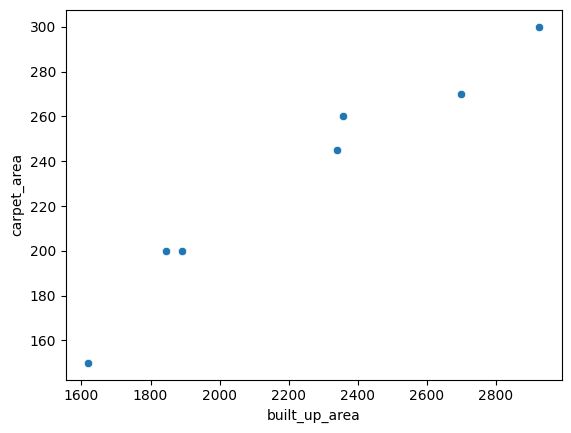

In [14]:
sns.scatterplot(data=c,x='built_up_area',y='carpet_area')

In [15]:
c.shape

(7, 24)

In [16]:
c

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,ratio
3394,hans enclave,2.00,10101.0,11.0,10.0,3,"pooja room,store room",3.0,East,Old Property,rajiv chowk,1979.84,house,NaN,1890.0,200.0,0,0,1,1,0,2,22,180.0
3501,indepedent,9.25,38724.0,12.0,12.0,3+,"pooja room,servant room,others",4.0,North-East,New Property,sector 31,2388.72,house,NaN,2358.0,260.0,0,1,0,1,1,1,49,199.0
3504,indepedent,NaN,NaN,12.0,12.0,3+,"pooja room,study room,servant room,others",4.0,North-East,New Property,sector 25,2248.84,house,NaN,2340.0,245.0,1,1,0,1,1,1,144,187.0
3571,indepedent,10.50,38571.0,12.0,12.0,3+,"servant room,pooja room",4.0,North-East,Relatively New,sector 26,2722.28,house,NaN,2700.0,270.0,0,1,0,1,0,0,72,227.0
3672,indepedent,16.00,50750.0,16.0,16.0,3+,"servant room,study room,pooja room,store room",4.0,West,New Property,sector 25,3152.68,house,NaN,2925.0,300.0,1,1,1,1,0,1,72,197.0
3673,indepedent,8.25,43564.0,12.0,12.0,3+,"pooja room,servant room",4.0,East,New Property,sector 27,1893.76,house,NaN,1845.0,200.0,0,1,0,1,0,0,40,158.0
3776,indepedent,6.09,33690.0,12.0,11.0,3+,pooja room,4.0,West,Moderately Old,sector 47,1807.68,house,NaN,1620.0,150.0,0,0,0,1,0,1,44,151.0


In [17]:
t=df[~(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())&(~df['carpet_area'].isnull())]

In [18]:
t.sample(5)

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,ratio
1205,la vida by tata housing,1.32,10344.0,2.0,2.0,2,not avilable,3.0,North-East,Relatively New,sector 113,1276.102,flat,1276.0,NaN,1099.0,0,0,0,0,0,2,49,638.0
592,dlf new town heights,1.54,6514.0,4.0,4.0,3+,"servant room,pooja room",12.0,South-West,Moderately Old,sector 90,2364.139,flat,2364.0,NaN,1850.0,0,1,0,1,0,0,111,591.0
601,adani m2k oyster grande,1.90,14074.0,3.0,4.0,3,servant room,21.0,NaN,Relatively New,sector 102,1350.007,flat,1889.0,NaN,1350.0,0,1,0,0,0,2,60,450.0
1245,capital residences 360,1.68,8502.0,3.0,3.0,3+,servant room,5.0,North-East,New Property,sector 70a,1976.006,flat,1976.0,NaN,1560.0,0,1,0,0,0,2,141,659.0
1567,mapsko royale ville,1.12,8000.0,3.0,4.0,2,"pooja room,servant room",6.0,North-West,Relatively New,sector 82,1400.000,flat,1790.0,NaN,1400.0,0,1,0,1,0,0,174,467.0


<Axes: xlabel='area', ylabel='built_up_area'>

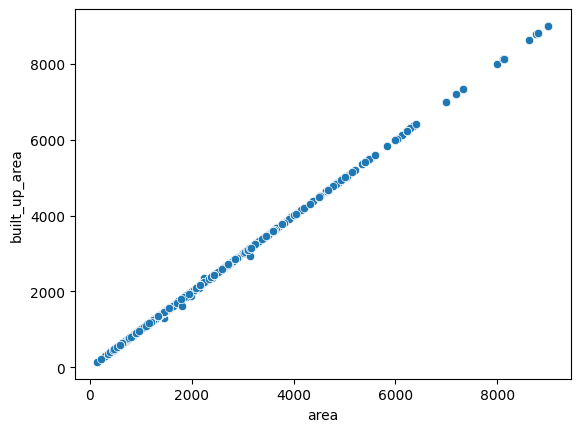

In [19]:
sns.scatterplot(data=df,x=df['area'],y=df['built_up_area'])

In [20]:
s=t[t['super_built_up_area']-t['carpet_area']<100]

In [21]:
s.shape

(76, 24)

In [22]:
s['built_up_area']=s['super_built_up_area']


/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_40046/307025473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['built_up_area']=s['super_built_up_area']


In [23]:
df.update(s)

In [24]:
temp=df[(~df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())&(df['carpet_area'].isnull())]

In [25]:
temp.shape

(931, 24)

In [26]:
temp['built_up_area']=(temp['super_built_up_area']*0.8)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_40046/3958806285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['built_up_area']=(temp['super_built_up_area']*0.8)


In [27]:
temp

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,ratio
4,parkwood westend,0.70,5204.0,2.0,2.0,3,study room,5.0,NaN,Under Construction,sector 92,1345.119,flat,1345.000000,1076.000000,NaN,1,0,0,0,0,2,0,673.0
6,the cocoon,2.00,13333.0,3.0,3.0,3,not avilable,5.0,NaN,New Property,dwarka expressway,1500.038,flat,1500.000000,1200.000000,NaN,0,0,0,0,0,2,0,500.0
13,godrej,0.95,6859.0,2.0,2.0,3+,not avilable,3.0,South-East,Under Construction,sector 33,1385.042,flat,1385.000000,1108.000000,NaN,0,0,0,0,0,2,0,693.0
14,shree vardhman flora,0.70,5384.0,2.0,2.0,3,study room,13.0,NaN,New Property,sector 90,1300.149,flat,1300.000000,1040.000000,NaN,1,0,0,0,0,2,15,650.0
18,central park flower valley,2.20,10476.0,3.0,3.0,3,servant room,12.0,North-East,New Property,sector 33,2100.038,flat,2100.000000,1680.000000,NaN,0,1,0,0,0,0,49,700.0
20,bestech altura,1.85,8604.0,3.0,4.0,3+,servant room,11.0,North,New Property,sector 79,2150.163,flat,2150.000000,1720.000000,NaN,0,1,0,0,0,2,49,717.0
21,smart world gems,0.86,7796.0,2.0,3.0,3,not avilable,4.0,NaN,Under Construction,sector 89,1103.130,flat,1103.000000,882.400000,NaN,0,0,0,0,0,2,45,552.0
23,la vida by tata housing,2.85,12855.0,3.0,3.0,3+,servant room,10.0,East,New Property,sector 113,2217.036,flat,2217.000000,1773.600000,NaN,0,1,0,0,0,2,72,739.0
34,supertech hues,0.82,6950.0,2.0,2.0,3+,others,21.0,NaN,Under Construction,sector 68,1179.856,flat,1180.000000,944.000000,NaN,0,0,0,0,1,2,72,590.0
41,mapsko casa bella,1.30,6378.0,4.0,4.0,3+,servant room,1.0,North,Relatively New,sector 82,2038.257,flat,1960.000000,1568.000000,NaN,0,1,0,0,0,2,130,510.0


In [28]:
df.update(temp)

In [29]:
t=df[~(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())&(~df['carpet_area'].isnull())]

In [30]:
t

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,ratio
30,bhawna cghs,3.25,10156.0,4.0,4.0,3+,pooja room,12.0,NaN,Moderately Old,sector 43,3200.079,flat,3200.000000,NaN,3000.000000,0,0,0,1,0,0,119,800.0
35,chintels paradiso,1.80,8866.0,3.0,3.0,2,servant room,0.0,East,Moderately Old,sector 109,2030.228,flat,2030.000000,NaN,1785.000000,0,1,0,0,0,2,83,677.0
36,breez global hill view,0.30,5403.0,2.0,2.0,2,not avilable,6.0,North-East,New Property,sohna road,555.247,flat,655.000000,NaN,555.000000,0,0,0,0,0,2,109,278.0
37,ild greens,0.78,5714.0,2.0,2.0,3,not avilable,1.0,North,Moderately Old,sector 37c,1365.068,flat,1365.000000,NaN,900.000000,0,0,0,0,0,0,103,683.0
58,"gokuldham society, bahadurgarh",0.50,5555.0,2.0,2.0,2,store room,2.0,NaN,Moderately Old,sector 7,900.090,flat,900.000000,NaN,750.000000,0,0,1,0,0,2,0,450.0
59,silverglades the melia,1.01,7000.0,2.0,2.0,3,study room,12.0,NaN,Undefined,sohna road,1442.857,flat,1450.000000,NaN,950.000000,1,0,0,0,0,2,80,721.0
61,umang winter hills,0.99,7857.0,2.0,2.0,2,not avilable,1.0,North,Relatively New,sector 77,1260.023,flat,1260.000000,NaN,1000.000000,0,0,0,0,0,2,97,630.0
83,puri the aravallis,3.87,17200.0,3.0,4.0,3+,servant room,21.0,East,Undefined,sector 61,2250.000,flat,2250.000000,NaN,1249.688790,0,1,0,0,0,2,58,750.0
102,emaar palm premier,2.10,10500.0,3.0,4.0,3+,servant room,11.0,NaN,New Property,sector 77,2000.000,flat,2000.000000,NaN,1500.000000,0,1,0,0,0,0,129,667.0
104,ramsons kshitij,0.32,4500.0,2.0,2.0,1,others,8.0,NaN,Relatively New,sector 95,711.111,flat,700.000000,NaN,443.365041,0,0,0,0,1,1,28,356.0


In [31]:
''' 1 sq ft=144 inch genrally 9 inch resident wall 6 inch innerwall'''
t['built_up_area']=t['carpet_area']

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_40046/517777660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['built_up_area']=t['carpet_area']


In [32]:
df.update(t)

In [33]:
df.isnull().sum()

society                   0
price                    67
price_persqft            33
bedRoom                  40
bathroom                 40
balcony                  40
additionalRoom            0
floorNum                 60
facing                 1134
agePossession             0
sector                    0
area                      0
type                      0
super_built_up_area    1914
built_up_area           940
carpet_area            1898
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
ratio                    40
dtype: int64

In [34]:
w_temp=df[df['built_up_area'].isnull()]

In [35]:
w_temp['built_up_area']=w_temp['carpet_area']

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_40046/4011550445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_temp['built_up_area']=w_temp['carpet_area']


In [36]:
df.update(w_temp)

In [37]:
df.isnull().sum()

society                   0
price                    67
price_persqft            33
bedRoom                  40
bathroom                 40
balcony                  40
additionalRoom            0
floorNum                 60
facing                 1134
agePossession             0
sector                    0
area                      0
type                      0
super_built_up_area    1914
built_up_area             0
carpet_area            1898
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
ratio                    40
dtype: int64

In [38]:
df1=df.copy()

In [39]:
df1.to_csv('copy_outlier.csv',index=False)

In [40]:
df.drop(columns=['super_built_up_area','carpet_area','area'],axis=1,inplace=True)

In [41]:
df.sample(5)

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,ratio
1926,sidhartha ncr one,0.57,4179.0,2.0,2.0,2,not avilable,10.0,NaN,Undefined,sector 95,flat,1232.0,0,0,0,0,0,2,0,682.0
910,ats triumph,1.83,7991.0,3.0,4.0,3+,servant room,10.0,North,Relatively New,sector 104,flat,1750.0,0,1,0,0,0,2,165,763.0
1306,sare homes,1.10,5347.0,4.0,4.0,3,servant room,4.0,North-West,Relatively New,sector 92,flat,2057.0,0,1,0,0,0,2,108,514.0
1349,parsvnath green ville,1.50,8787.0,3.0,3.0,3,not avilable,1.0,North,Old Property,sector 48,flat,1400.0,0,0,0,0,0,0,128,569.0
53,deepak minda,1.25,4715.0,4.0,4.0,3+,not avilable,6.0,NaN,Moderately Old,sector 1,flat,2651.0,0,0,0,0,0,0,44,663.0


In [42]:
df.shape

(3803, 21)

In [43]:
'''A small bedroom might be around 100 to 150 square feet,
while a larger master bedroom could be 200 square feet or more.'''
df=df[df['ratio']>100]

In [44]:
df.shape

(3736, 21)

In [45]:
df.drop(columns='ratio',axis=1,inplace=True)

In [46]:
df.sample(5)

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
863,ats kocoon,1.65,10645.0,3.0,3.0,3,store room,19.0,East,Relatively New,sector 109,flat,1550.0,0,0,1,0,0,0,159
208,"ganpati apartment 2, laxman vihar phase 1",0.45,4705.0,2.0,2.0,1,not avilable,0.0,East,Relatively New,sector 4,flat,850.0,0,0,0,0,0,2,46
517,ss the leaf,1.04,5973.0,2.0,3.0,3+,store room,4.0,West,Relatively New,sector 85,flat,1392.8,0,0,1,0,0,2,113
3035,indepedent,0.50,6083.0,3.0,2.0,1,not avilable,1.0,NaN,Undefined,sector 9,house,750.0,0,0,0,0,0,2,0
2422,ats tourmaline,2.30,8897.0,3.0,4.0,3+,"servant room,others",10.0,East,New Property,sector 109,flat,2068.0,0,1,0,0,1,2,74


In [47]:
df.drop(columns='additionalRoom',axis=1,inplace=True)

In [48]:
df.sample(5)

,society,price,price_persqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
517,ss the leaf,1.04,5973.0,2.0,3.0,3+,4.0,West,Relatively New,sector 85,flat,1392.8,0,0,1,0,0,2,113
1070,pivotal devaan,0.35,6003.0,2.0,2.0,1,4.0,East,Relatively New,sector 84,flat,466.4,0,0,0,0,0,2,37
208,"ganpati apartment 2, laxman vihar phase 1",0.45,4705.0,2.0,2.0,1,0.0,East,Relatively New,sector 4,flat,850.0,0,0,0,0,0,2,46
840,indiabulls centrum park,2.14,7443.0,4.0,6.0,3+,7.0,East,Relatively New,sector 103,flat,2550.0,0,1,0,0,0,2,142
1731,tulip violet,1.60,10139.0,3.0,3.0,2,0.0,South-West,Relatively New,sector 69,flat,1262.4,0,0,0,1,0,2,49


In [49]:
df.isnull().sum()

society               0
price                26
price_persqft        26
bedRoom               0
bathroom              0
balcony               0
floorNum             20
facing             1084
agePossession         0
sector                0
type                  0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [50]:
df.drop(df[df['price'].isnull()].index,axis=0,inplace=True)

In [51]:
df.isnull().sum()

society               0
price                 0
price_persqft         0
bedRoom               0
bathroom              0
balcony               0
floorNum             20
facing             1069
agePossession         0
sector                0
type                  0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [52]:
df[(df['floorNum'].isnull())&(df['facing'].isnull())]

,society,price,price_persqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
176,experion heartsong,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,dwarka expressway,flat,1756.098,0,0,0,0,0,2,0
2976,indepedent,1.45,2995.0,3.0,3.0,1,NaN,NaN,Old Property,sector 24,house,4842.000,0,0,0,0,0,2,9
3023,indepedent,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,sector 3,house,1452.600,0,0,0,0,0,2,0
3039,indepedent,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,sector 4,house,4639.000,0,0,0,0,0,2,0
3050,indepedent,2.50,5472.0,3.0,2.0,1,NaN,NaN,Old Property,new sector 2 phase 2,house,4004.000,0,0,0,0,0,2,8
3128,indepedent,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,sector 4,house,581.000,0,0,0,0,0,2,0
3151,ansal sushant lok plots,3.30,26656.0,1.0,1.0,0,NaN,NaN,Under Construction,sector 43,house,1238.000,0,0,0,0,0,2,0
3170,indepedent,1.10,8094.0,2.0,2.0,1,NaN,NaN,Old Property,sector 9,house,1359.000,0,0,0,0,1,2,0
3299,jacob pura,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,sector 12,house,355.080,0,0,0,0,0,2,0
3331,indepedent,13.00,45759.0,6.0,8.0,3+,NaN,NaN,Relatively New,sector 25,house,2841.000,1,1,1,1,0,1,0


In [53]:
h=df[df['type']=='house']

In [54]:
h['floorNum'].isnull().sum()

19

In [55]:
h['floorNum'].median()

2.0

In [56]:
h['floorNum'].fillna(2.0,inplace=True)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_40046/2949179800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['floorNum'].fillna(2.0,inplace=True)


In [57]:
df.update(h)

In [58]:
 df.isnull().sum()

society               0
price                 0
price_persqft         0
bedRoom               0
bathroom              0
balcony               0
floorNum              1
facing             1069
agePossession         0
sector                0
type                  0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [59]:
df.shape

(3710, 19)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'West'),
  Text(1, 0, 'North-East'),
  Text(2, 0, 'South-East'),
  Text(3, 0, 'North'),
  Text(4, 0, 'South-West'),
  Text(5, 0, 'East'),
  Text(6, 0, 'North-West'),
  Text(7, 0, 'South')])

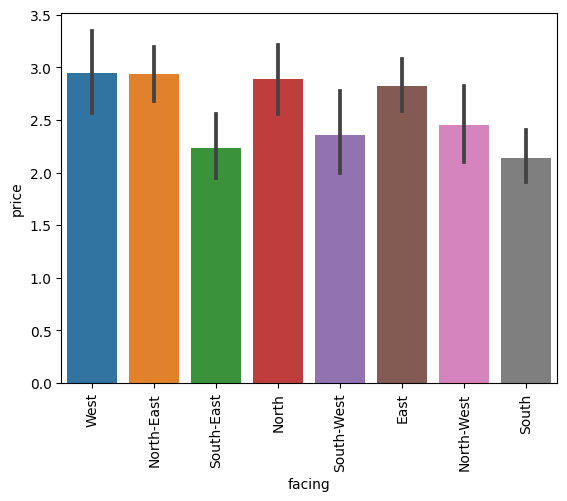

In [60]:
sns.barplot(data=df,x='facing',y='price')
plt.xticks(rotation='vertical')

<Axes: ylabel='count'>

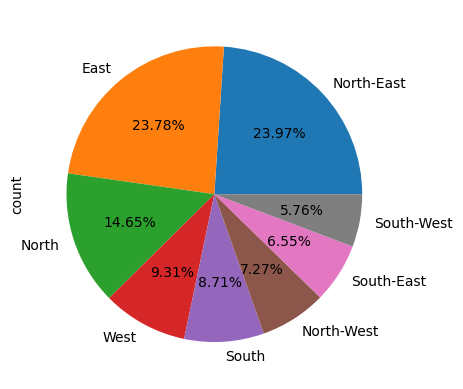

In [61]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [62]:
(1069/df.shape[0])*100

28.81401617250674

In [63]:
df.drop(columns='facing',axis=1,inplace=True)

In [64]:
df[df['floorNum'].isnull()]

,society,price,price_persqft,bedRoom,bathroom,balcony,floorNum,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
176,experion heartsong,1.08,6150.0,3.0,3.0,0,NaN,Under Construction,dwarka expressway,flat,1756.098,0,0,0,0,0,2,0


In [65]:
df.drop(176,axis=0,inplace=True)

In [66]:
df['agePossession'].value_counts()

agePossession
Relatively New        1634
New Property           594
Moderately Old         574
Undefined              455
Old Property           329
Under Construction     123
Name: count, dtype: int64

In [67]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['type'] == row['type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [68]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [69]:
df['agePossession'].value_counts()

agePossession
Relatively New        1807
New Property           672
Moderately Old         615
Old Property           368
Under Construction     125
Undefined              122
Name: count, dtype: int64

In [70]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [71]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [72]:
df['agePossession'].value_counts()

agePossession
Relatively New        1827
New Property           699
Moderately Old         623
Old Property           379
Under Construction     125
Undefined               56
Name: count, dtype: int64

In [73]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['type'] == row['type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [74]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [75]:
df['agePossession'].value_counts()

agePossession
Relatively New        1847
New Property           699
Moderately Old         659
Old Property           379
Under Construction     125
Name: count, dtype: int64

In [76]:
df.isnull().sum()

society            0
price              0
price_persqft      0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
sector             0
type               0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [ ]:
df.to_csv('missing_imputation_value.csv',index=False)